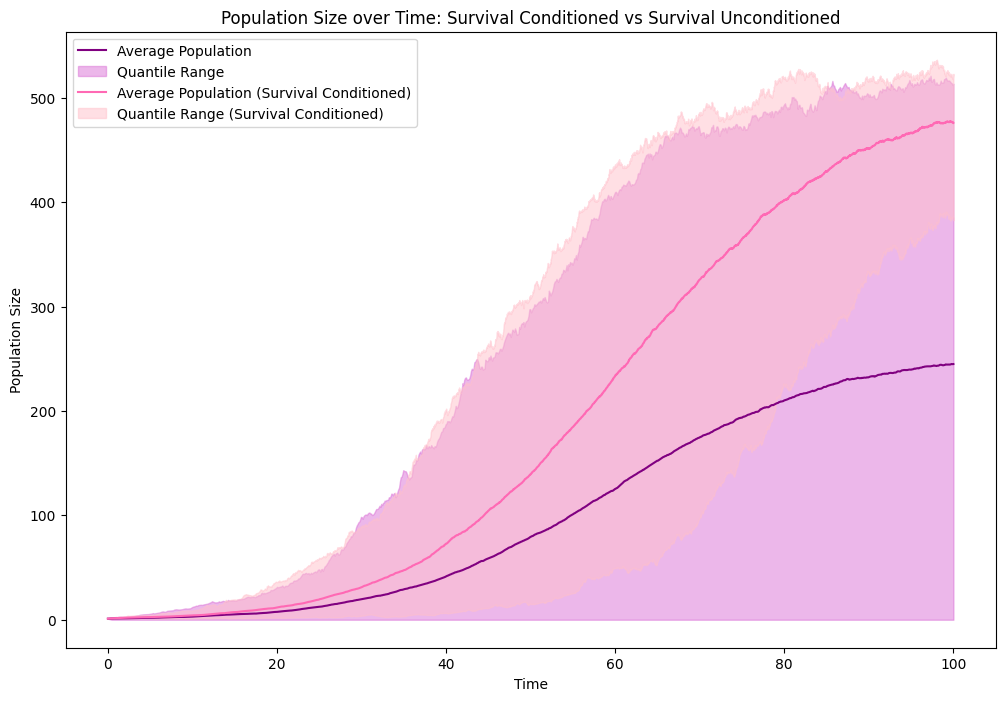

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = birth_rate * (1 - population / carrying_capacity) + death_rate * (population / carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate * population + effective_birth_rate * population))
        
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, survival_conditioned=False):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    max_len = max(len(sim) for sim in all_time_points)
    num_points = max_len if survival_conditioned else 1000
    average_time_points = np.linspace(0, max_time, num_points)

    if survival_conditioned:
        non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
        non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
        interpolations = np.zeros((len(non_extinct_populations), num_points))

        for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
            interpolations[i] = np.interp(average_time_points, time, pop)
    else:
        interpolations = np.zeros((num_simulations, num_points))
        for i in range(num_simulations):
            interpolations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolations, axis=0)
    lower_quantile = np.nanquantile(interpolations, 0.05, axis=0)
    upper_quantile = np.nanquantile(interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_combined_simulations(normal_params, survival_params, num_simulations=100):
    # Run normal simulations
    avg_time_normal, interp_normal, avg_pop_normal, lower_quant_normal, upper_quant_normal, ext_prob_normal = run_multiple_simulations_with_quantiles(normal_params, num_simulations)
    
    # Run survival-conditioned simulations
    avg_time_survival, interp_survival, avg_pop_survival, lower_quant_survival, upper_quant_survival, ext_prob_survival = run_multiple_simulations_with_quantiles(survival_params, num_simulations, survival_conditioned=True)

    plt.figure(figsize=(12, 8))

    # Plot normal simulations
    plt.plot(avg_time_normal, avg_pop_normal, color='purple', linestyle='-', label='Average Population')
    plt.fill_between(avg_time_normal, lower_quant_normal, upper_quant_normal, color='orchid', alpha=0.5, label='Quantile Range')

    # Plot survival-conditioned simulations
    plt.plot(avg_time_survival, avg_pop_survival, color='hotpink', linestyle='-', label='Average Population (Survival Conditioned)')
    plt.fill_between(avg_time_survival, lower_quant_survival, upper_quant_survival, color='pink', alpha=0.5, label='Quantile Range (Survival Conditioned)')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time: Survival Conditioned vs Survival Unconditioned')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1)

# Plot results
plot_combined_simulations(params, params, num_simulations=100)


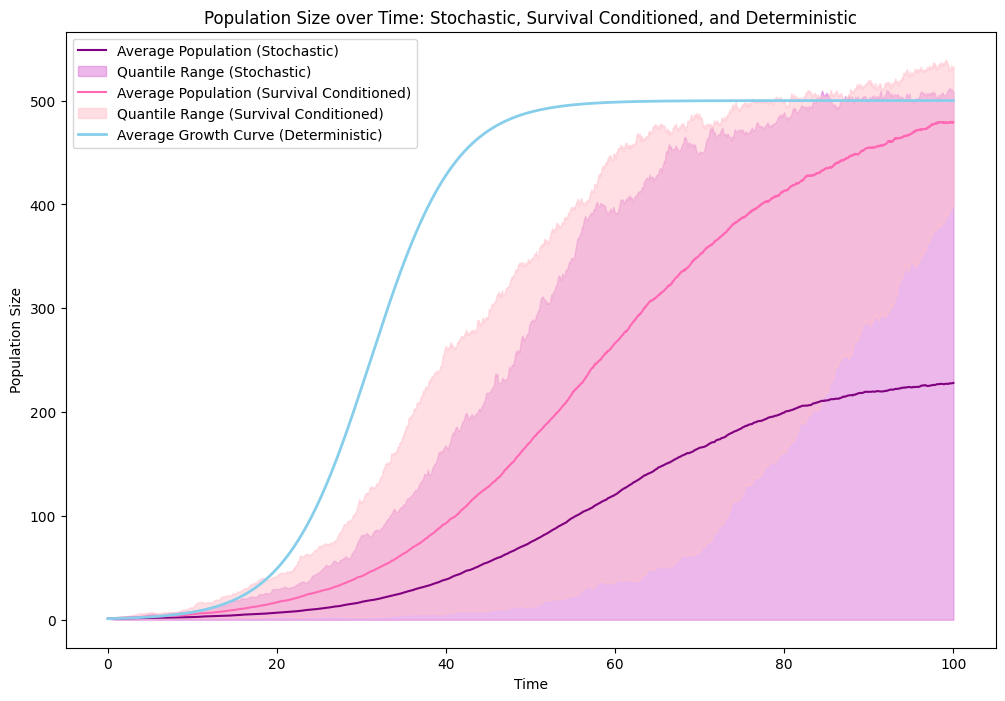

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic logistic growth model parameters and functions
def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = birth_rate * (1 - population / carrying_capacity) + death_rate * (population / carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate * population + effective_birth_rate * population))
        
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, survival_conditioned=False):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    max_len = max(len(sim) for sim in all_time_points)
    num_points = max_len if survival_conditioned else 1000
    average_time_points = np.linspace(0, max_time, num_points)

    if survival_conditioned:
        non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
        non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
        interpolations = np.zeros((len(non_extinct_populations), num_points))

        for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
            interpolations[i] = np.interp(average_time_points, time, pop)
    else:
        interpolations = np.zeros((num_simulations, num_points))
        for i in range(num_simulations):
            interpolations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolations, axis=0)
    lower_quantile = np.nanquantile(interpolations, 0.05, axis=0)
    upper_quantile = np.nanquantile(interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

# Deterministic logistic growth model function
def deterministic_logistic_growth(P0, r, K, t):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Function to run multiple deterministic simulations
def run_multiple_deterministic_simulations(P0, r, K, t_points, num_simulations=100):
    all_population_sizes = []
    
    for _ in range(num_simulations):
        P_t = deterministic_logistic_growth(P0, r, K, t_points)
        all_population_sizes.append(P_t)
    
    return all_population_sizes

def plot_combined_simulations(normal_params, survival_params, deterministic_params, num_simulations=100):
    # Run normal simulations
    avg_time_normal, interp_normal, avg_pop_normal, lower_quant_normal, upper_quant_normal, ext_prob_normal = run_multiple_simulations_with_quantiles(normal_params, num_simulations)
    
    # Run survival-conditioned simulations
    avg_time_survival, interp_survival, avg_pop_survival, lower_quant_survival, upper_quant_survival, ext_prob_survival = run_multiple_simulations_with_quantiles(survival_params, num_simulations, survival_conditioned=True)

    # Run deterministic simulations
    t_points = np.linspace(0, deterministic_params['max_time'], 500)
    all_det_population_sizes = run_multiple_deterministic_simulations(deterministic_params['initial_population'], deterministic_params['birth_rate'], deterministic_params['carrying_capacity'], t_points, num_simulations)
    avg_pop_deterministic = np.mean(all_det_population_sizes, axis=0)

    plt.figure(figsize=(12, 8))

    # Plot normal simulations
    plt.plot(avg_time_normal, avg_pop_normal, color='purple', linestyle='-', label='Average Population (Stochastic)')
    plt.fill_between(avg_time_normal, lower_quant_normal, upper_quant_normal, color='orchid', alpha=0.5, label='Quantile Range (Stochastic)')

    # Plot survival-conditioned simulations
    plt.plot(avg_time_survival, avg_pop_survival, color='hotpink', linestyle='-', label='Average Population (Survival Conditioned)')
    plt.fill_between(avg_time_survival, lower_quant_survival, upper_quant_survival, color='pink', alpha=0.5, label='Quantile Range (Survival Conditioned)')

    # Plot deterministic simulations
    plt.plot(t_points, avg_pop_deterministic, color='skyblue', linestyle='-', linewidth=2, label='Average Growth Curve (Deterministic)')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time: Stochastic, Survival Conditioned, and Deterministic')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1)

deterministic_params = {
    'initial_population': 1,
    'birth_rate': 0.2,
    'carrying_capacity': 500,
    'max_time': 100
}

# Plot results
plot_combined_simulations(params, params, deterministic_params, num_simulations=100)
